### This module estimates parameters of probability distributions with MLE for independent and identically distributed data
### Jacobian and Hessian of the log likelihood functions are calculated symbolically for higher accuracy

In [1]:
%pylab inline
from statsmodels.base.model import GenericLikelihoodModel
import mle
import pdfs
import scipy.stats as ss

Populating the interactive namespace from numpy and matplotlib


### Example 1: Data from a normal distribution

In [22]:
N = 16

mu_true, s_true = 2.5, 1.3

data_norm = np.random.normal(loc=mu_true, scale=s_true, size=N)

#### Estimate distribution parameters with symbolic MLE

In [36]:
norm = pdfs.normal()
model_norm = mle.mle_model_iids(data_norm, mle.make_MLE_model(norm))

fit_res_norm = mle.fit_mle(model_norm, [1., 1.]) 
print(fit_res_norm)
covar_norm = mle.mle_param_covar(fit_res_norm.x, model_norm)

print(50*'=')
for name, val, err in zip(model_norm.pars, fit_res_norm.x, np.sqrt(np.diag(covar_norm))):
    print(f'{name} = {val:.4f} +/- {err:.4f} ')

      fun: 25.200511022960903
 hess_inv: array([[0.08622745, 0.00065178],
       [0.00065178, 0.04320367]])
      jac: array([-1.31988812e-07, -2.04829813e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([2.05723033, 1.16893537])
mu = 2.0572 +/- 0.2922 
s = 1.1689 +/- 0.2066 


/anaconda/envs/py37/lib/python3.7/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method bfgs does not use Hessian information (hess).
  RuntimeWarning)


#### Estimate with StatsModels

In [37]:
class Norm(GenericLikelihoodModel):

    nparams = 3

    def loglike(self, params):
        return ss.norm.logpdf(self.endog, *params).sum()
    
res = Norm(data_norm).fit(start_params=[1., 1.])
res.df_model = 2
res.df_resid = len(data_norm) - 2
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.575032
         Iterations: 42
         Function evaluations: 79
                                 Norm Results                                 
Dep. Variable:                      y   Log-Likelihood:                -25.201
Model:                           Norm   AIC:                             56.40
Method:            Maximum Likelihood   BIC:                             58.72
Date:                Wed, 10 Apr 2019                                         
Time:                        14:40:35                                         
No. Observations:                  16                                         
Df Residuals:                      14                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

### Example 2: Data from an exponential distribution

In [44]:
N = 16

mu_true = 1.5

data_expon = np.random.exponential(scale=mu_true, size=N)

In [46]:
expon = pdfs.expon()
model_expon = mle.mle_model_iids(data_expon, mle.make_MLE_model(expon))

fit_res_expon = mle.fit_mle(model_expon, [1.]) 
print(fit_res_expon)
covar_expon = mle.mle_param_covar(fit_res_expon.x, model_expon)

print(50*'=')
for name, val, err in zip(model_expon.pars, fit_res_expon.x, np.sqrt(np.diag(covar_expon))):
    print(f'{name} = {val:.4f} +/- {err:.4f} ')

      fun: 23.47071732285937
 hess_inv: array([[0.1596467]])
      jac: array([3.30082115e-06])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([1.59507405])
mu = 1.5951 +/- 0.3988 


/anaconda/envs/py37/lib/python3.7/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method bfgs does not use Hessian information (hess).
  RuntimeWarning)


#### Estimate with StatsModels

In [50]:
class Expon(GenericLikelihoodModel):

    nparams = 3

    def loglike(self, params):
        return ss.expon.logpdf(self.endog, *params).sum()
    
res = Expon(data_expon).fit(start_params=[1.])
res.df_model = 1
res.df_resid = len(data_expon) - 1
print(res.summary())

                                Expon Results                                 
Dep. Variable:                      y   Log-Likelihood:                   -inf
Model:                          Expon   AIC:                               inf
Method:            Maximum Likelihood   BIC:                               inf
Date:                Wed, 10 Apr 2019                                         
Time:                        14:45:24                                         
No. Observations:                  16                                         
Df Residuals:                      15                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
par0           1.0000        nan        nan        nan         nan         nan


/anaconda/envs/py37/lib/python3.7/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:351: RuntimeWarning: invalid value encountered in double_scalars
  - (f(*((x - ee[i, :] + ee[j, :],) + args), **kwargs)
/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:352: RuntimeWarning: invalid value encountered in double_scalars
  - f(*((x - ee[i, :] - ee[j, :],) + args), **kwargs))
/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Example 3: Mixture of two normal distributions

In [2]:
N = 1000

p, mu1, s1, mu2, s2 = 0.7, 1., 0.4, 2., 0.3

a = np.random.binomial(1, p, size=N)

data_sum_norm = a*np.random.normal(loc=mu1, scale=s1, size=N) + \
(1-a)*np.random.normal(loc=mu2, scale=s2, size=N)

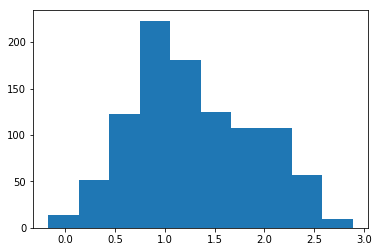

In [3]:
counts, bins, _ = hist(data_sum_norm, bins=10)

In [4]:
sum_norm = pdfs.sum_two_normal()
model_sum_norm = mle.mle_model_iids(data_sum_norm, mle.make_MLE_model(sum_norm))

fit_res_sum_norm = mle.fit_mle(model_sum_norm, [0.6, 1.1, 0.5, 2.1, 0.4], method='nelder-mead') 
print(fit_res_sum_norm)
covar_sum_norm = mle.mle_param_covar(fit_res_sum_norm.x, model_sum_norm)

print(50*'=')
for name, val, err in zip(model_sum_norm.pars, fit_res_sum_norm.x, np.sqrt(np.diag(covar_sum_norm))):
    print(f'{name} = {val:.4f} +/- {err:.4f} ')

/anaconda/envs/py37/lib/python3.7/site-packages/scipy/optimize/_minimize.py:502: RuntimeWarning: Method nelder-mead does not use gradient information (jac).
  RuntimeWarning)
/anaconda/envs/py37/lib/python3.7/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method nelder-mead does not use Hessian information (hess).
  RuntimeWarning)


 final_simplex: (array([[0.73609134, 1.00253217, 0.40902397, 2.07407513, 0.28101308],
       [0.73613816, 1.00255368, 0.40902859, 2.07412451, 0.2809671 ],
       [0.73613184, 1.00259026, 0.40905274, 2.07415348, 0.28097311],
       [0.73612935, 1.00257623, 0.40906427, 2.07411384, 0.28098599],
       [0.73608862, 1.00254107, 0.40903456, 2.07414007, 0.28096971],
       [0.73611511, 1.00253013, 0.40903695, 2.07414057, 0.28100761]]), array([863.27949639, 863.2794967 , 863.27949713, 863.2794972 ,
       863.27949883, 863.27949899]))
           fun: 863.2794963869468
       message: 'Optimization terminated successfully.'
          nfev: 280
           nit: 173
        status: 0
       success: True
             x: array([0.73609134, 1.00253217, 0.40902397, 2.07407513, 0.28101308])
p = 0.7361 +/- 0.0262 
mu1 = 1.0025 +/- 0.0263 
s1 = 0.4090 +/- 0.0186 
mu2 = 2.0741 +/- 0.0359 
s2 = 0.2810 +/- 0.0225 


### Fit bins

In [5]:
bin_centers = 0.5*(bins[1:] + bins[:-1])

In [7]:
sum_norm = pdfs.sum_two_normal()
model_sum_norm = mle.mle_model_iids_hist(bin_centers, counts, mle.make_MLE_model(sum_norm))

fit_res_sum_norm = mle.fit_mle(model_sum_norm, [0.6, 1.1, 0.5, 2.1, 0.4], method='nelder-mead') 
print(fit_res_sum_norm)
covar_sum_norm = mle.mle_param_covar(fit_res_sum_norm.x, model_sum_norm)

print(50*'=')
for name, val, err in zip(model_sum_norm.pars, fit_res_sum_norm.x, np.sqrt(np.diag(covar_sum_norm))):
    print(f'{name} = {val:.4f} +/- {err:.4f} ')

 final_simplex: (array([[0.73314413, 1.00269759, 0.41639695, 2.07019994, 0.30231073],
       [0.733198  , 1.00274196, 0.41642735, 2.07026929, 0.30229732],
       [0.73320134, 1.00275648, 0.41643217, 2.07029751, 0.30226518],
       [0.73315264, 1.00268692, 0.41640926, 2.07020052, 0.30232921],
       [0.73320295, 1.00272558, 0.41642289, 2.07025621, 0.30227152],
       [0.73317188, 1.00272154, 0.4164376 , 2.07020688, 0.30231883]]), array([880.69750818, 880.6975083 , 880.69750841, 880.69750875,
       880.69750943, 880.69751052]))
           fun: 880.6975081755268
       message: 'Optimization terminated successfully.'
          nfev: 277
           nit: 166
        status: 0
       success: True
             x: array([0.73314413, 1.00269759, 0.41639695, 2.07019994, 0.30231073])
p = 0.7331 +/- 0.0311 
mu1 = 1.0027 +/- 0.0304 
s1 = 0.4164 +/- 0.0206 
mu2 = 2.0702 +/- 0.0447 
s2 = 0.3023 +/- 0.0265 


/anaconda/envs/py37/lib/python3.7/site-packages/scipy/optimize/_minimize.py:502: RuntimeWarning: Method nelder-mead does not use gradient information (jac).
  RuntimeWarning)
/anaconda/envs/py37/lib/python3.7/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method nelder-mead does not use Hessian information (hess).
  RuntimeWarning)


(array([ 11.,  36.,  73., 128.,  70.,  38.,  58.,  64.,  27.,   7.]),
 array([-1.78966829, -0.90472409, -0.01977988,  0.86516432,  1.75010852,
         2.63505272,  3.51999692,  4.40494112,  5.28988532,  6.17482952,
         7.05977373]),
 <a list of 10 Patch objects>)

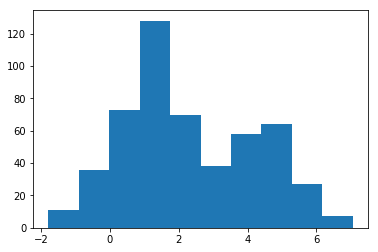

In [77]:
hist(data)